In [66]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv2
import matplotlib.image as mpimg
from tensorflow.keras.callbacks import ModelCheckpoint

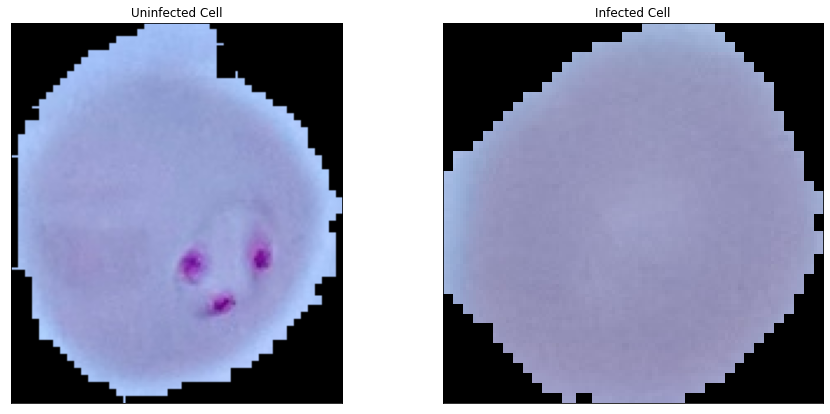

In [37]:
infected_cells = 'C:/Users/Apoorv/Documents/GitHub/malaria-parasite-presence-detection/input_images/cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'
uninfected_cells = 'C:/Users/Apoorv/Documents/GitHub/malaria-parasite-presence-detection/input_images/cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'

plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(infected_cells))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(uninfected_cells))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])
plt.show()

In [73]:
width = 128
height = 128


datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

#Generating the training set
trainDatagen = datagen.flow_from_directory(directory='C:/Users/Apoorv/Documents/GitHub/malaria-parasite-presence-detection/input_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [74]:
#Generating the validation set
valDatagen = datagen.flow_from_directory(directory='C:/Users/Apoorv/Documents/GitHub/malaria-parasite-presence-detection/input_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [47]:
#Feature extraction
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)       

In [70]:
#Comiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

early_stop = EarlyStopping(monitor='val_loss',patience=2)

history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks = [checkpoint])

Epoch 1/20
1378/1378 [==============================] - 197s 143ms/step - loss: 0.1260 - accuracy: 0.9616 - val_loss: 0.1789 - val_accuracy: 0.9358

Epoch 00001: loss improved from inf to 0.11889, saving model to best_model.hdf5
Epoch 2/20
1378/1378 [==============================] - 204s 148ms/step - loss: 0.1069 - accuracy: 0.9638 - val_loss: 0.1743 - val_accuracy: 0.9347

Epoch 00002: loss improved from 0.11889 to 0.10936, saving model to best_model.hdf5
Epoch 3/20
1378/1378 [==============================] - 202s 147ms/step - loss: 0.1106 - accuracy: 0.9634 - val_loss: 0.1736 - val_accuracy: 0.9368

Epoch 00003: loss improved from 0.10936 to 0.10892, saving model to best_model.hdf5
Epoch 4/20
1378/1378 [==============================] - 202s 146ms/step - loss: 0.1084 - accuracy: 0.9611 - val_loss: 0.1698 - val_accuracy: 0.9390

Epoch 00004: loss improved from 0.10892 to 0.10567, saving model to best_model.hdf5
Epoch 5/20
1378/1378 [==============================] - 208s 151ms/step 